In [ ]:
import os
from time import time
from tqdm import tqdm
import numpy
import torch
from torch.nn import Linear, CrossEntropyLoss
from torch.optim import Adam
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import ImageFolder
from torchvision.models import resnet18
from torchvision.transforms import transforms

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
tfm = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=10),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [ ]:
TRAIN_ROOT = '/content/drive/MyDrive/Carla/train-data/Data (Train)'
TEST_ROOT = '/content/drive/MyDrive/Carla/test-data/Data (Validation)'

train_ds = ImageFolder(TRAIN_ROOT, transform=tfm)
test_ds = ImageFolder(TEST_ROOT, transform=tfm)

In [ ]:
LEN_TRAIN = len(train_ds)
LEN_TEST = len(test_ds)
print(LEN_TRAIN, LEN_TEST)

3657 763


In [ ]:
print(train_ds.class_to_idx)

{'a': 0, 'd': 1, 's': 2, 'w': 3}


In [ ]:
train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=32, shuffle=True)

In [ ]:
model = resnet18(pretrained=True)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [ ]:
model.fc = Linear(in_features=512, out_features=4, bias=True)

In [ ]:
# model_weight_path = '/content/drive/MyDrive/Carla/weights/model-weights2.pth'

In [ ]:
# model.load_state_dict(torch.load(model_weight_path))
# model.train()

In [ ]:
model = model.to(device)

In [ ]:
optimiser = Adam(model.parameters(), lr=3e-4, weight_decay=1e-4)

In [ ]:
criterion = CrossEntropyLoss()

In [ ]:
for epoch in range(50):
    start = time()
    
    tr_acc = 0
    test_acc = 0
    
    model.train()
    with tqdm(train_loader, unit="batch") as tepoch:
        for X, y in tepoch:
            optimiser.zero_grad()
            X = X.to(device)
            train_prob = model(X)
            train_prob = train_prob.cpu()
            loss = criterion(train_prob, y)
            loss.backward()
            optimiser.step()
            train_pred = torch.max(train_prob, 1).indices
            tr_acc += torch.sum(train_pred == y)
        ep_tr_acc = tr_acc / LEN_TRAIN
    model.eval()
    with torch.no_grad():
        for X, y in test_loader:
            X = X.to(device)
            test_prob = model(X)
            test_prob = test_prob.cpu()
            
            test_pred = torch.max(test_prob, 1).indices
            test_acc += torch.sum(test_pred == y)
        ep_test_acc = test_acc/LEN_TEST
    end = time()
    duration = (end - start)/60
    
    print(f"Epoch: {epoch}, Time: {duration}, Loss: {loss}\n Train_acc: {ep_tr_acc},  Test_acc: {ep_test_acc}")

100%|██████████| 115/115 [15:49<00:00,  8.25s/batch]


Epoch: 0, Time: 18.182183039188384, Loss: 0.6420469284057617
 Train_acc: 0.6138911843299866,  Test_acc: 0.30144166946411133


100%|██████████| 115/115 [00:58<00:00,  1.97batch/s]


Epoch: 1, Time: 1.1818223237991332, Loss: 0.605355978012085
 Train_acc: 0.7265518307685852,  Test_acc: 0.401048481464386


100%|██████████| 115/115 [01:01<00:00,  1.88batch/s]


Epoch: 2, Time: 1.2171321868896485, Loss: 0.7568486928939819
 Train_acc: 0.7716707587242126,  Test_acc: 0.6539973616600037


100%|██████████| 115/115 [00:59<00:00,  1.92batch/s]


Epoch: 3, Time: 1.1992015322049459, Loss: 1.03891921043396
 Train_acc: 0.7853431701660156,  Test_acc: 0.46133682131767273


100%|██████████| 115/115 [00:58<00:00,  1.97batch/s]


Epoch: 4, Time: 1.1733925938606262, Loss: 0.3358817994594574
 Train_acc: 0.8135083317756653,  Test_acc: 0.4272608160972595


100%|██████████| 115/115 [00:59<00:00,  1.93batch/s]


Epoch: 5, Time: 1.190567183494568, Loss: 0.3071969747543335
 Train_acc: 0.8260869383811951,  Test_acc: 0.5779816508293152


100%|██████████| 115/115 [00:57<00:00,  1.99batch/s]


Epoch: 6, Time: 1.1606913685798645, Loss: 0.5352591276168823
 Train_acc: 0.8372983336448669,  Test_acc: 0.42070773243904114


100%|██████████| 115/115 [00:57<00:00,  1.99batch/s]


Epoch: 7, Time: 1.1635182658831278, Loss: 0.6835201978683472
 Train_acc: 0.8567131757736206,  Test_acc: 0.4757536053657532


100%|██████████| 115/115 [00:58<00:00,  1.97batch/s]


Epoch: 8, Time: 1.174476404984792, Loss: 0.25892403721809387
 Train_acc: 0.8509707450866699,  Test_acc: 0.4351245164871216


100%|██████████| 115/115 [00:58<00:00,  1.95batch/s]


Epoch: 9, Time: 1.1797497351964314, Loss: 0.36794590950012207
 Train_acc: 0.8580803871154785,  Test_acc: 0.5491480827331543


100%|██████████| 115/115 [00:59<00:00,  1.94batch/s]


Epoch: 10, Time: 1.1880651235580444, Loss: 0.24269114434719086
 Train_acc: 0.8610883355140686,  Test_acc: 0.5622542500495911


100%|██████████| 115/115 [00:58<00:00,  1.95batch/s]


Epoch: 11, Time: 1.181082252661387, Loss: 0.22655126452445984
 Train_acc: 0.8698386549949646,  Test_acc: 0.5609436631202698


100%|██████████| 115/115 [00:57<00:00,  1.99batch/s]


Epoch: 12, Time: 1.1592190464337666, Loss: 0.2838074862957001
 Train_acc: 0.8810500502586365,  Test_acc: 0.5635648965835571


100%|██████████| 115/115 [00:56<00:00,  2.04batch/s]


Epoch: 13, Time: 1.1356797536214194, Loss: 0.522888720035553
 Train_acc: 0.8919879794120789,  Test_acc: 0.5006552934646606


100%|██████████| 115/115 [00:57<00:00,  2.00batch/s]


Epoch: 14, Time: 1.15503884156545, Loss: 0.4882422089576721
 Train_acc: 0.8966366052627563,  Test_acc: 0.5674967169761658


100%|██████████| 115/115 [00:56<00:00,  2.04batch/s]


Epoch: 15, Time: 1.1406632264455159, Loss: 0.32824453711509705
 Train_acc: 0.894995927810669,  Test_acc: 0.5570117831230164


100%|██████████| 115/115 [00:56<00:00,  2.02batch/s]


Epoch: 16, Time: 1.1514274835586549, Loss: 0.24452029168605804
 Train_acc: 0.8993710875511169,  Test_acc: 0.48230668902397156


100%|██████████| 115/115 [00:58<00:00,  1.97batch/s]


Epoch: 17, Time: 1.1688165585199992, Loss: 0.1444840431213379
 Train_acc: 0.8865190148353577,  Test_acc: 0.5085189938545227


100%|██████████| 115/115 [00:57<00:00,  2.00batch/s]


Epoch: 18, Time: 1.148349948724111, Loss: 1.3928974866867065
 Train_acc: 0.9004648327827454,  Test_acc: 0.5307994484901428


100%|██████████| 115/115 [00:57<00:00,  1.99batch/s]


Epoch: 19, Time: 1.152885337670644, Loss: 0.7253798842430115
 Train_acc: 0.9081214070320129,  Test_acc: 0.5412843823432922


100%|██████████| 115/115 [00:59<00:00,  1.95batch/s]


Epoch: 20, Time: 1.1701894362767538, Loss: 0.08844619244337082
 Train_acc: 0.9133169054985046,  Test_acc: 0.5386631488800049


100%|██████████| 115/115 [00:58<00:00,  1.98batch/s]


Epoch: 21, Time: 1.156479787826538, Loss: 0.09064970910549164
 Train_acc: 0.9207000136375427,  Test_acc: 0.5688073635101318


100%|██████████| 115/115 [00:57<00:00,  2.01batch/s]


Epoch: 22, Time: 1.1464852809906005, Loss: 0.24806462228298187
 Train_acc: 0.9231610894203186,  Test_acc: 0.5150721073150635


100%|██████████| 115/115 [00:58<00:00,  1.96batch/s]


Epoch: 23, Time: 1.1681670387585958, Loss: 0.10990455746650696
 Train_acc: 0.9294503927230835,  Test_acc: 0.5019659399986267


100%|██████████| 115/115 [00:56<00:00,  2.02batch/s]


Epoch: 24, Time: 1.133959205945333, Loss: 0.27400365471839905
 Train_acc: 0.9321848750114441,  Test_acc: 0.5190039277076721


100%|██████████| 115/115 [00:56<00:00,  2.02batch/s]


Epoch: 25, Time: 1.1443614919980367, Loss: 0.10870977491140366
 Train_acc: 0.9278096556663513,  Test_acc: 0.5937090516090393


100%|██████████| 115/115 [00:57<00:00,  1.99batch/s]


Epoch: 26, Time: 1.1525097131729125, Loss: 0.25155404210090637
 Train_acc: 0.9286300539970398,  Test_acc: 0.5045871734619141


100%|██████████| 115/115 [00:56<00:00,  2.02batch/s]


Epoch: 27, Time: 1.1413147966066997, Loss: 0.03764061629772186
 Train_acc: 0.9349193572998047,  Test_acc: 0.4980340898036957


100%|██████████| 115/115 [00:56<00:00,  2.03batch/s]


Epoch: 28, Time: 1.1434546113014221, Loss: 0.5645602941513062
 Train_acc: 0.9392945170402527,  Test_acc: 0.5347313284873962


100%|██████████| 115/115 [00:57<00:00,  2.01batch/s]


Epoch: 29, Time: 1.1524701078732809, Loss: 0.2081930786371231
 Train_acc: 0.9382007122039795,  Test_acc: 0.4796854555606842


100%|██████████| 115/115 [00:56<00:00,  2.03batch/s]


Epoch: 30, Time: 1.1425460616747538, Loss: 0.20552997291088104
 Train_acc: 0.9412086606025696,  Test_acc: 0.5268676280975342


100%|██████████| 115/115 [00:56<00:00,  2.04batch/s]


Epoch: 31, Time: 1.132761279741923, Loss: 1.366236925125122
 Train_acc: 0.93792724609375,  Test_acc: 0.44167760014533997


100%|██████████| 115/115 [00:57<00:00,  2.00batch/s]


Epoch: 32, Time: 1.1564697662989298, Loss: 0.20194323360919952
 Train_acc: 0.9373803734779358,  Test_acc: 0.5006552934646606


100%|██████████| 115/115 [00:56<00:00,  2.03batch/s]


Epoch: 33, Time: 1.138593065738678, Loss: 0.19896388053894043
 Train_acc: 0.9450368881225586,  Test_acc: 0.5058977603912354


100%|██████████| 115/115 [00:56<00:00,  2.04batch/s]


Epoch: 34, Time: 1.1364548325538635, Loss: 0.05914394184947014
 Train_acc: 0.9548810720443726,  Test_acc: 0.4757536053657532


100%|██████████| 115/115 [00:57<00:00,  2.01batch/s]


Epoch: 35, Time: 1.1536657373110453, Loss: 0.026731671765446663
 Train_acc: 0.9543341398239136,  Test_acc: 0.5150721073150635


100%|██████████| 115/115 [00:55<00:00,  2.06batch/s]


Epoch: 36, Time: 1.1287152409553527, Loss: 0.24313518404960632
 Train_acc: 0.952146589756012,  Test_acc: 0.4731323719024658


100%|██████████| 115/115 [00:56<00:00,  2.04batch/s]


Epoch: 37, Time: 1.1339389085769653, Loss: 0.2013816386461258
 Train_acc: 0.951599657535553,  Test_acc: 0.5216251611709595


100%|██████████| 115/115 [00:57<00:00,  2.01batch/s]


Epoch: 38, Time: 1.1528837005297343, Loss: 0.19317038357257843
 Train_acc: 0.9453103542327881,  Test_acc: 0.6094364523887634


100%|██████████| 115/115 [00:56<00:00,  2.03batch/s]


Epoch: 39, Time: 1.1404564420382182, Loss: 0.2928869128227234
 Train_acc: 0.9589827656745911,  Test_acc: 0.5045871734619141


100%|██████████| 115/115 [00:56<00:00,  2.05batch/s]


Epoch: 40, Time: 1.1310050408045451, Loss: 0.05542217940092087
 Train_acc: 0.9529669284820557,  Test_acc: 0.44954127073287964


100%|██████████| 115/115 [00:57<00:00,  2.01batch/s]


Epoch: 41, Time: 1.1479135274887085, Loss: 0.31758564710617065
 Train_acc: 0.9474979639053345,  Test_acc: 0.5661861300468445


100%|██████████| 115/115 [00:55<00:00,  2.05batch/s]


Epoch: 42, Time: 1.1312087456385294, Loss: 0.29353049397468567
 Train_acc: 0.9464041590690613,  Test_acc: 0.5491480827331543


100%|██████████| 115/115 [00:56<00:00,  2.03batch/s]


Epoch: 43, Time: 1.1377080798149108, Loss: 0.2238980382680893
 Train_acc: 0.95952969789505,  Test_acc: 0.5635648965835571


100%|██████████| 115/115 [00:58<00:00,  1.97batch/s]


Epoch: 44, Time: 1.1554250319798787, Loss: 0.05813301354646683
 Train_acc: 0.9619907140731812,  Test_acc: 0.49279162287712097


100%|██████████| 115/115 [00:57<00:00,  2.01batch/s]


Epoch: 45, Time: 1.1360724329948426, Loss: 0.01920037902891636
 Train_acc: 0.9628110527992249,  Test_acc: 0.48754915595054626


100%|██████████| 115/115 [00:57<00:00,  2.01batch/s]


Epoch: 46, Time: 1.1421361168225606, Loss: 0.009230767376720905
 Train_acc: 0.9576155543327332,  Test_acc: 0.5504587292671204


100%|██████████| 115/115 [00:58<00:00,  1.96batch/s]


Epoch: 47, Time: 1.1785104115804037, Loss: 0.011718694120645523
 Train_acc: 0.9647251963615417,  Test_acc: 0.4954128563404083


100%|██████████| 115/115 [00:57<00:00,  2.01batch/s]


Epoch: 48, Time: 1.1500157197316487, Loss: 0.32057881355285645
 Train_acc: 0.9622641801834106,  Test_acc: 0.5203145742416382


100%|██████████| 115/115 [00:56<00:00,  2.02batch/s]


Epoch: 49, Time: 1.1499071637789409, Loss: 0.3898118734359741
 Train_acc: 0.9655455350875854,  Test_acc: 0.503276526927948


In [ ]:
CPU_PATH = '/content/drive/MyDrive/Carla/weights/model-weight-cpu2.pth'
GPU_PATH = '/content/drive/MyDrive/Carla/weights/model-weight-gpu2.pth'

We are saving both cpu and gpu weights.

In [ ]:
torch.save(model.state_dict(), GPU_PATH)

In [ ]:
model = model.cpu()

In [ ]:
torch.save(model.state_dict(), CPU_PATH)

In [ ]:
model2 = resnet18(pretrained=True)
model2.fc = Linear(in_features=512, out_features=4, bias=True)
model2.load_state_dict(torch.load(GPU_PATH))
model2.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
sample = '/content/drive/MyDrive/Carla/test-data/Data2(Validation)/a/00005002.png'

In [ ]:
from PIL import Image
import numpy as np

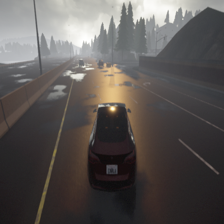

tensor([1], device='cuda:0')


In [ ]:
img = Image.open(sample).convert('RGB')
display(img.resize((224, 224)))
img_tensor = tfm(img)
img_tensor = img_tensor[np.newaxis, :]
img_tensor = img_tensor.to(device)
model2 = model2.to(device)
pred_prob = model2(img_tensor)
pred = torch.max(pred_prob, 1).indices
print(pred)